In [ ]:
#ket noi voi drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
path = '/content/drive/MyDrive/Final'

train_datagen =ImageDataGenerator(rescale=1./255,validation_split=0.2)

# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Final/Train',target_size=(256,256), batch_size=128, class_mode='categorical')

# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Final/validation',target_size=(256,256), batch_size=128, class_mode='categorical')

# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

Found 3990 images belonging to 10 classes.
Found 1006 images belonging to 10 classes.


{'Asagi': 0,
 'Bekko': 1,
 'Difference': 2,
 'Hikarimuji mono': 3,
 'Kohaku': 4,
 'Sanke': 5,
 'Showa': 6,
 'Shusui': 7,
 'Tancho': 8,
 'Utsuri': 9}

In [ ]:
def CNN_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    X = tfl.Conv2D(8, kernel_size=(4,4), strides=(1,1), padding='SAME')(input_img)
    X = tfl.ReLU()(X)
    X = tfl.MaxPool2D(pool_size=(8,8), strides=(8,8), padding='SAME')(X)
    X = tfl.Conv2D(16, kernel_size=(2,2), strides=(1,1), padding='SAME')(X)
    X = tfl.ReLU()(X)
    X = tfl.MaxPool2D(pool_size=(4,4), strides=(4,4), padding='SAME')(X)
    X = tfl.Flatten()(X)
    outputs = tfl.Dense(units=10, activation="softmax")(X)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
output = 10

model = Sequential()
model.add(Conv2D(64,(3,3),padding = 'same', kernel_initializer = 'he_uniform', input_shape = (256,256,3), activation = 'relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), padding = 'same',  kernel_initializer = 'he_uniform', activation = 'relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), padding='same',  kernel_initializer = 'he_uniform', activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu',  kernel_initializer = 'he_uniform'))

model.add(Dense(output, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

history = model.fit(training_set, epochs=20, validation_data=validation, batch_size=128)

Epoch 1/20
32/32 [==============================] - 1700s 52s/step - loss: 4.7025 - accuracy: 0.3298 - val_loss: 1.3241 - val_accuracy: 0.5586
Epoch 2/20
32/32 [==============================] - 1399s 44s/step - loss: 0.9520 - accuracy: 0.6862 - val_loss: 0.6170 - val_accuracy: 0.8121
Epoch 3/20
32/32 [==============================] - 1407s 44s/step - loss: 0.3746 - accuracy: 0.8925 - val_loss: 0.4011 - val_accuracy: 0.8777
Epoch 4/20
32/32 [==============================] - 1402s 44s/step - loss: 0.1770 - accuracy: 0.9524 - val_loss: 0.2752 - val_accuracy: 0.9185
Epoch 5/20
32/32 [==============================] - 1380s 43s/step - loss: 0.0613 - accuracy: 0.9827 - val_loss: 0.2958 - val_accuracy: 0.9125
Epoch 6/20
32/32 [==============================] - 1382s 43s/step - loss: 0.0403 - accuracy: 0.9922 - val_loss: 0.2315 - val_accuracy: 0.9344
Epoch 7/20
32/32 [==============================] - 1382s 43s/step - loss: 0.0348 - accuracy: 0.9947 - val_loss: 0.2787 - val_accuracy: 0.9334

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0057297698222100735
Train Accuracy 0.9984962344169617


<function matplotlib.pyplot.show>

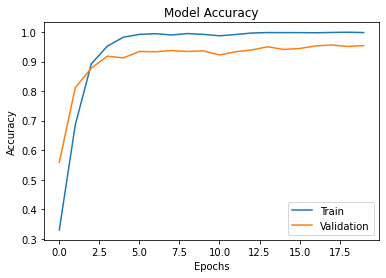

In [ ]:
import matplotlib.pyplot as plt
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show


In [ ]:
# Lưu lại
model.save("fish_KOI.h5")

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tải mô hình 
model_KOI=load_model('/content/drive/MyDrive/Final/fish_KOI.h5')

In [ ]:
test="/content/drive/MyDrive/Final/test"
for i in os.listdir(test):
  link = test+'/'+i
  img=load_img(link,target_size=(256,256))
  # plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_KOI.predict(img)
  if round(result[0][0])==1:
    prediction='Asagi'
  if round(result[0][1])==1:
    prediction='Bekko'
  if round(result[0][2])==1:
    prediction='Difference'
  if round(result[0][3])==1:
    prediction='Hikarimuji mono'
  if round(result[0][4])==1:
    prediction='Kohaku'
  if round(result[0][5])==1:
    prediction='Sanke'
  if round(result[0][6])==1:
    prediction='Showa'
  if round(result[0][7])==1:
    prediction='Shusui'
  if round(result[0][8])==1:
    prediction='Tancho'
  if round(result[0][9])==1:
    prediction='Utsuri'
  print(prediction)
  plt.show()


Kohaku
Showa
Kohaku
Showa
Showa
Asagi
Asagi
Hikarimuji mono
Showa
Kohaku
Hikarimuji mono
Sanke
Showa
Difference
Difference
Shusui


In [ ]:
classes = ['Asagi', 'Bekko', 'Difference', 'Hikarimuji mono', 'Kohaku','Sanke', 
           'Showa', 'Shusui', 'Tancho', 'Utsuri']

from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

test="/content/drive/MyDrive/Final/test"
address = []
for i in os.listdir(test):
  link = test+'/'+i
  address.append(link)
  

  
for add in address:
  img = load_img(add,target_size=(256,256))
  plt.imshow(img)
  img = img_to_array(img)
  img=img.reshape(1,256,256,3)
  img=img.astype('float32')
  img = img/255
  print("Kết quả dự đoán:")
  print(classes[np.argmax(model_KOI.predict(img))])

# print(address)
# /content/drive/MyDrive/Final/test/1 (3).jpg
# /content/drive/MyDrive/Final/test/1 (14).jpg
# /content/drive/MyDrive/Final/test/1 (13).jpg
# /content/drive/MyDrive/Final/test/1 (2).jpg
# /content/drive/MyDrive/Final/test/1 (16).jpg
# /content/drive/MyDrive/Final/test/1 (11).jpg
# /content/drive/MyDrive/Final/test/1 (10).jpg
# /content/drive/MyDrive/Final/test/1 (1).jpg
# /content/drive/MyDrive/Final/test/1 (1).jpeg
# /content/drive/MyDrive/Final/test/1 (9).jpg
# /content/drive/MyDrive/Final/test/1 (5).jpg
# /content/drive/MyDrive/Final/test/32.jpg
# /content/drive/MyDrive/Final/test/29.jpg
# /content/drive/MyDrive/Final/test/5.jpg
# /content/drive/MyDrive/Final/test/4.jpg
# /content/drive/MyDrive/Final/test/10.jpg

In [ ]:

############################################# realtime
from IPython.display import display, Javascript, Image
# JavaScript to properly create our live video stream using our webcam as input

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'Bấm vào video để dừng</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
%cd /content
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import cv2
from keras.models import  load_model


# start streaming video from webcam
video_stream()
# label for video
label_html = 'Đang lấy hình ảnh...'
# initialze bounding box to emptyA
bbox = ''
count = 0 

# Load model Nhận diện
model_file_path = "/content/drive/MyDrive/Final/fish_KOI.h5"

vggmodel = load_model(model_file_path)
# vggmodel1 = load_model(model_file_path_1)
# vggmodel2= load_model(model_file_path_2)

# classes =['Asagi', 'Bekko', 'Difference', 'Hikarimuji mono', 'Kohaku','Sanke', 'Showa', 'Shusui', 'Tancho', 'Utsuri']

classes =['Asagi', 'Bekko', 'Bekko', 'Hikarimuji mono', 'Kohaku','Sanke', 'Showa', 'Shusui', 'Tancho', 'Utsuri']

while True:
    # Đọc ảnh trả về từ JS
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # Resize để đưa vào model
    frame_p = cv2.resize(frame, dsize=(256,256))
    # frame_p1 = cv2.resize(frame, dsize=(70,70))
    # frame_p2 = cv2.resize(frame, dsize=(100,100))

    tensor = np.expand_dims(frame_p, axis=0)
    # tensor1 = np.expand_dims(frame_p1, axis=0)
    # tensor2 = np.expand_dims(frame_p2, axis=0)

    # Feed vào mạng
    pred = vggmodel.predict(tensor)
    
    # pred1 = vggmodel1.predict(tensor1)
    # pred2 = vggmodel2.predict(tensor2)

    class_id = np.argmax(pred)
    # class_id_1 = np.argmax(pred1)
    # class_id_2 = np.argmax(pred2)
    # label =['Sleep','No Sleep']
    # if class_id == 2 or class_id == 3:
    #   class_name = label[1] 
    # if class_id == 1 or class_id == 4:
    #   class_name = label[0] 
    class_name = classes[class_id]  
   

    # class_name_1 = classes1[class_id_1]
    # class_name_2 = classes2[class_id_2]
    # Vẽ lên một ảnh để tẹo nữa overlay

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
   
    bbox_array = cv2.putText(bbox_array, "{}".format(class_name),
                        (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 255,0), 2)
    
    y_pred = vggmodel.predict(tensor)
    a = y_pred.max()
    #a = a*100
    bbox_array = cv2.putText(bbox_array, "{}".format(a),
                        (400, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 255,0), 2)   

     
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255

    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes